In [1]:
%load_ext autoreload
%autoreload 2 

In [2]:
import WordEmbedding


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import WordEmbedding
word2vectorObj = WordEmbedding.WordEmbedding()
word2vectorObj. ReadGloVeVecs(gloveSize=300)

In [4]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
import warnings

import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

import RNN

warnings.filterwarnings('ignore')

class SentimentAnalyzer:

    dataset = pd.DataFrame()
    
    trainingsetX = []
    trainingsetY = []
    testsetX = []
    testsetY = []
    
    rnnObject = RNN.RNN()
    
    
    
    #word2vectorObj = Word2vector.WordToVector()
    
    textFieldName = "text"
    
    def LoadDataset(self,datasetName):
        self.dataset = pd.read_csv(datasetName,error_bad_lines=False)
        self.dataset.dropna(inplace=True)
        self.dataset.reset_index(drop=True,inplace=True)
        
    def SetTrainingset(self,trainingDatasetDir):
        
        trainingDataset = pd.read_csv(trainingDatasetDir,error_bad_lines=False)
        self.trainingsetX = trainingDataset["text"]
        self.trainingsetX = np.array(self.trainingsetX)
        
        
        print (trainingDataset)
        self.trainingsetY= trainingDataset["sentiment"]
        self.trainingsetY = np.array(self.trainingsetY)
        
    def SetTestset(self,testDatasetDir):
        
        testDataset = pd.read_csv(testDatasetDir,error_bad_lines=False)
        self.testsetX = testDataset["text"]
        self.testsetX = np.array(self.testsetX)
        
        self.testsetY = testDataset["sentiment"]
        self.testsetY = np.array(self.testsetY)

        
        
    def CleanDataset(self,lenguage,textFieldName = "text",withDataset = True):

        negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                        "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                        "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                        "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                        "mustn't":"must not"}
        
        neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
        
        reDictionary = { 'https_pat': r'https?://[^ ]+', 
                        'www_pat':r'www.[^ ]+',
                        'hashtag':r'#[^ ]+',
                        'mention':r'@[^ ]+',
                        'rt':r'RT @[^ ]+',
                        'neg_pattern':neg_pattern,
                        'negations_dic':negations_dic
                    }
        
        cleanDataset = []
        self.textFieldName = textFieldName
        

            
        
        if(lenguage is "english"):
            
            for i in range(0,len(self.dataset)):
                cleanDataset.append(self.CleanEnglishDataset(self.dataset[textFieldName][i],reDictionary))
                
        else:
            if(withDataset):
                
                for i in range(0,len(self.dataset)):
                    print(self.dataset["text"][i])
                    cleanDataset.append(self.CleanSpanishDataset(self.dataset["text"][i],reDictionary))
                
                cleanDataset = pd.DataFrame(cleanDataset,columns=['text'])
                cleanDataset['sentiment'] = self.dataset["sentiment"]
                self.dataset = cleanDataset
                    
            else:
                trainingset = []
                testset = []
                
                for i in range(0,len(self.trainingsetX)):
                    trainingset.append(self.CleanSpanishDataset(self.trainingsetX[i],reDictionary))
                    
                for i in range(0,len(self.testsetX)):
                    testset.append(self.CleanSpanishDataset(self.testsetX[i],reDictionary))
                
                self.trainingsetX = np.array(trainingset)
                self.testsetX = np.array(testset)
                

                

    def CleanEnglishDataset(self,text,reDictionary):
        
        tok = WordPunctTokenizer()

        cleanText = BeautifulSoup(text, 'lxml')
        cleanText = cleanText.get_text()   
        
        try:
            cleanText = cleanText.decode("utf-8-sig").replace(u"∩┐╜", "?")
        except:
            cleanText = cleanText
            
        cleanText = re.sub(reDictionary["hashtag"],'',cleanText)
        cleanText = re.sub(reDictionary["rt"],'',cleanText)
        cleanText = re.sub(reDictionary["mention"],'',cleanText)
        cleanText = re.sub(reDictionary["https_pat"],'',cleanText)
        cleanText = re.sub(reDictionary["www_pat"],'',cleanText)
        cleanText = cleanText.lower()
        neg_handled = reDictionary["neg_pattern"].sub(lambda x: reDictionary["negations_dic"][x.group()], cleanText)
        cleanText = re.sub("[^a-zA-Z]", " ", neg_handled)
        cleanText = [x for x  in tok.tokenize(cleanText) if len(x) > 1]
        
        return (" ".join(cleanText)).strip()
        
                
    def CleanSpanishDataset(self,text,reDictionary):
        
        tok = WordPunctTokenizer()

        cleanText = BeautifulSoup(text, 'lxml')
        cleanText = cleanText.get_text()   
        
        try:
            cleanText = cleanText.decode("utf-8-sig").replace(u"∩┐╜", "?")
        except:
            cleanText = cleanText
            
        cleanText = re.sub(reDictionary["hashtag"],'',cleanText)
        cleanText = re.sub(reDictionary["rt"],'',cleanText)
        cleanText = re.sub(reDictionary["mention"],'',cleanText)
        cleanText = re.sub(reDictionary["https_pat"],'',cleanText)
        cleanText = re.sub(reDictionary["www_pat"],'',cleanText)
        cleanText = cleanText.lower()
        
        cleanText = cleanText.replace("á","a")
        cleanText = cleanText.replace("é","e")
        cleanText = cleanText.replace("í","i")
        cleanText = cleanText.replace("ó","o")
        cleanText = cleanText.replace("ú","u")        
        
        cleanText = re.sub("[^a-zA-Z]", " ", cleanText)
        cleanText = [x for x  in tok.tokenize(cleanText) if len(x) > 1]
        
        return (" ".join(cleanText)).strip()
    
    def SplitDataset(self,test_sizeP=0.3,random_state=200):
        
        #random =200
        
        self.trainingsetX, self.testsetX, self.trainingsetY, self.testsetY = train_test_split(self.dataset["text"], 
                                                            self.dataset["sentiment"], 
                                                            test_size= test_sizeP, 
                                                            random_state=random_state)
        
        self.trainingsetX = np.array(self.trainingsetX)
        self.trainingsetY = np.array(self.trainingsetY)
        self.trainingsetY = self.trainingsetY.astype(int)
        
        self.testsetX = np.array(self.testsetX)
        self.testsetY = np.array(self.testsetY)
        self.testsetY = self.testsetY.astype(int)
        
    def convert_to_one_hot(self,Y, C):    
        
        Y = np.eye(C)[Y.reshape(-1)]
        return Y

    
    def LoadW2V(self,source="wikipedia"):
        
        #self.word2vectorObj.ReadGloVeVecs(gloveSize=200,source=source)
        #self.word2vectorObj.ReadGoogleVec()
        self.word2vectorObj.ReadFacebookVec()

        
        if source is "twitter":
            del self.word2vectorObj.wordToIndex["-0.29736"]
    
    def TrainModel(self,word2vectorObj):
        
        #self.rnnObject.LSTMModel ((45,), self.word2vectorObj.W2V2PretrainedEmbeddingLayer())
        self.rnnObject.LSTMConvModel ((45,), word2vectorObj.PretrainedEmbeddingLayer())
            
        X_train_indices = word2vectorObj.sentencesToIndices(self.trainingsetX, 45)   
        
        
        print(self.trainingsetY)
        Y_train_oh = self.convert_to_one_hot(self.trainingsetY, C = 3)
        
        X_test_indices = word2vectorObj.sentencesToIndices(self.testsetX, 45)
        
        
        
        Y_test_oh = self.convert_to_one_hot(self.testsetY, C = 3)
        Y_test_oh = self.convert_to_one_hot(self.testsetY, C = 3)

        self.rnnObject.CompileModel()
        print( self.rnnObject.model.summary())
        self.rnnObject.FitModel(X_train_indices,Y_train_oh,X_test_indices,Y_test_oh)
        
    def Predict(self,newDataset,word2vectorObj):
        
        x = newDataset["text"]
        sentiments = newDataset["sentiment"]
        
        xIndices = word2vectorObj.sentencesToIndices(x, word2vectorObj.wordToIndex, 45)
        predictions = self.Predict(xIndices)

        
 

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
x = SentimentAnalyzer()

In [6]:
x.SetTestset('/home/ksquare/Documents/SentimentAnalysis/English/Datasets/Meet/test/test2.csv')

In [7]:
x.SetTrainingset('/home/ksquare/Documents/SentimentAnalysis/English/Datasets/Meet/train/training2.csv')

                                                    text  sentiment
0      @virginamerica why don't any of the pairings i...          0
1      @VirginAmerica I just did, how can I DM? Do u ...          2
2      @VirginAmerica your website sucks donkey dicks...          0
3                           @united thats weak. See ya 👋          0
4      @united what time? Who can I call. I need my s...          0
5      @united it's frustrating, as a frequent flyer,...          0
6      @united the proper response: sorry for your wa...          0
7           @united two years old.  Birthdate 11/13/2012          2
8      @united aaaand 7 hours Late Flightr won't be c...          0
9      @united Flight 472 from ORD couldn't let me kn...          0
10     @united Appreciated, but in this case we waite...          0
11     @United You were doing so well until the PHL-S...          0
12     @united I don't know what DM the confirmation ...          2
13                                    @united yo

In [8]:
x.CleanDataset(lenguage='english',withDataset=False)

(1000656, 300)
[0 2 0 ... 2 2 1]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 45)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 45, 300)           300196800 
_________________________________________________________________
lstm_1 (LSTM)                (None, 45, 128)           219648    
_________________________________________________________________
dropout_1 (Dropout)          (None, 45, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)     

14543/14543 [==============================] - 25s 2ms/step - loss: 0.5181 - categorical_accuracy: 0.7953 - val_loss: 0.4965 - val_categorical_accuracy: 0.8031
Epoch 41/100
14543/14543 [==============================] - 26s 2ms/step - loss: 0.5101 - categorical_accuracy: 0.7969 - val_loss: 0.4947 - val_categorical_accuracy: 0.8024
Epoch 42/100
14543/14543 [==============================] - 25s 2ms/step - loss: 0.5039 - categorical_accuracy: 0.7969 - val_loss: 0.5565 - val_categorical_accuracy: 0.7741
Epoch 43/100
14543/14543 [==============================] - 25s 2ms/step - loss: 0.5036 - categorical_accuracy: 0.7984 - val_loss: 0.4992 - val_categorical_accuracy: 0.8013
Epoch 44/100
14543/14543 [==============================] - 25s 2ms/step - loss: 0.5134 - categorical_accuracy: 0.7963 - val_loss: 0.5201 - val_categorical_accuracy: 0.7855
Epoch 45/100
14543/14543 [==============================] - 25s 2ms/step - loss: 0.4968 - categorical_accuracy: 0.8067 - val_loss: 0.4662 - val_cate

14543/14543 [==============================] - 24s 2ms/step - loss: 0.2266 - categorical_accuracy: 0.9124 - val_loss: 0.2007 - val_categorical_accuracy: 0.9216
Epoch 88/100
14543/14543 [==============================] - 24s 2ms/step - loss: 0.2217 - categorical_accuracy: 0.9144 - val_loss: 0.2139 - val_categorical_accuracy: 0.9172
Epoch 89/100
14543/14543 [==============================] - 24s 2ms/step - loss: 0.2281 - categorical_accuracy: 0.9114 - val_loss: 0.3150 - val_categorical_accuracy: 0.8696
Epoch 90/100
14543/14543 [==============================] - 25s 2ms/step - loss: 0.2430 - categorical_accuracy: 0.9044 - val_loss: 0.1818 - val_categorical_accuracy: 0.9328
Epoch 91/100
14543/14543 [==============================] - 24s 2ms/step - loss: 0.2059 - categorical_accuracy: 0.9208 - val_loss: 0.1996 - val_categorical_accuracy: 0.9214
Epoch 92/100
14543/14543 [==============================] - 24s 2ms/step - loss: 0.2249 - categorical_accuracy: 0.9160 - val_loss: 0.2051 - val_cate

<Figure size 432x288 with 0 Axes>

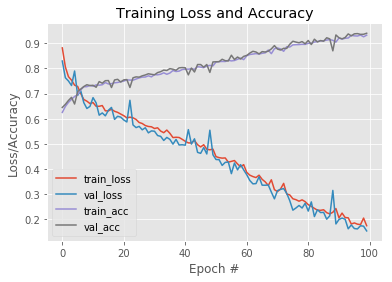

In [9]:
x.TrainModel(word2vectorObj)

In [10]:
SentimentAnalyzer.rnnObject.model.save("SentimenMeet9396.h5")

In [ ]:
from sklearn.externals import joblib
joblib.dump(word2vectorObj.wordToIndex, 'FacebookW2V.pkl') 



In [ ]:
clf = joblib.load('filename.pkl') 